<a href="https://colab.research.google.com/github/hyunmila/um/blob/main/lab4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [10]:

# train_dir = str(main_path)+'/dogs_and_cats_small/train'
# val_dir = str(main_path)+'/dogs_and_cats_small/validate'

train_dir = 'dogs_and_cats_small/train'
val_dir = 'dogs_and_cats_small/validate'

In [4]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
def create_model():
    model = keras.models.Sequential()
    # model_2.add(data_augmentation)
    # model_2.add(keras.layers.Rescaling(scale=1./255, input_shape=(150,150, 3)))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model

model_1 = create_model()
# model_1.summary()

In [6]:
epochs = 100

history = model_1.fit(train_generator, epochs=epochs, validation_data=validation_generator)



Epoch 1/100
100/100 [==============================] - 411s 4s/step - loss: 0.6948 - accuracy: 0.5085 - val_loss: 0.7032 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 28s 285ms/step - loss: 0.6925 - accuracy: 0.5255 - val_loss: 0.6878 - val_accuracy: 0.5020
Epoch 3/100
100/100 [==============================] - 28s 283ms/step - loss: 0.6876 - accuracy: 0.5335 - val_loss: 0.6778 - val_accuracy: 0.6040
Epoch 4/100
100/100 [==============================] - 28s 278ms/step - loss: 0.6789 - accuracy: 0.5740 - val_loss: 0.6831 - val_accuracy: 0.5525
Epoch 5/100
100/100 [==============================] - 27s 274ms/step - loss: 0.6798 - accuracy: 0.5585 - val_loss: 0.6765 - val_accuracy: 0.5445
Epoch 6/100
100/100 [==============================] - 27s 273ms/step - loss: 0.6718 - accuracy: 0.5725 - val_loss: 0.6975 - val_accuracy: 0.5325
Epoch 7/100
100/100 [==============================] - 28s 280ms/step - loss: 0.6633 - accuracy: 0.5870 - val_loss: 0.6567 - v

In [7]:
history_df = pd.DataFrame(history.history)
with open("history_2.json", mode='w') as f:
    history_df.to_json(f)

In [8]:
data = pd.read_json("history_2.json")


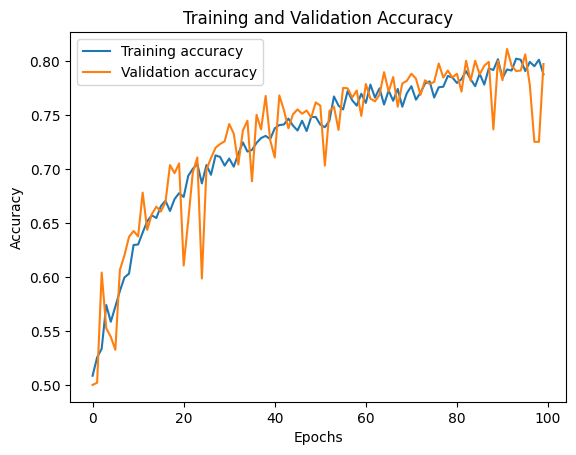

In [9]:
plt.plot(data['accuracy'], label= 'Training accuracy')
plt.plot(data['val_accuracy'], label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.grid()
# plt.xticks(np.arange(0, int(epochs+1)))
plt.legend(loc='best')
plt.show()